League Of Legend Match Data <br>
Goal : Predict winner team based on information at early game stage. <br>
16 Columns (13 categorical data) 10000 rows <br>
majority : miniority class = 8 : 2 <br>
missing data : about 5% <br>
Evaluation Metric: ROC - AUC

In [8]:
!jt -t onedork

<b>Results</b>

- Best Model parameters:<br>
    StackingClassifier(final estimator=<b>Logistic Regression</b>,final_estimator__C= 0.1,stack_method='auto'}) <br>
   and the following 5 estimators:<br>
    1. DecisionTree(max_depth=5)<br>
    2. Random Forest(criterion='gini', max_depth=6, max_features='auto',n_estimators=100)<br>
    3. Gradient Boost(learning_rate= 0.5, max_depth= 6, n_estimators=150)<br>
    4. ExtraTrees(criterion='entropy', max_depth= 8, max_features='auto', n_estimators=50)<br>
    5. XGBoost(learning_rate=0.5, max_depth=6, min_child_weight=1, n_estimators=150, subsample=0.8)<br><br>
    
- Mean Cross validation score of Best model:<br>
    0.8883
- Train score of bestmodel:<br>
    0.9963
- Test score of best model:<br>
    0.9020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("LeagueOL.csv")

In [3]:
pd.pandas.set_option('display.max_columns', 999)
df.head()

,gameId,gameDuration,firstBlood,firstTower,firstRiftHerald,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id,T1win
0,3330653802,1227.0,1,1,0,141.0,133.0,90.0,163.0,92,8.0,238.0,40.0,96.0,64.0,1
1,3318136043,2345.0,1,2,1,112.0,32.0,92.0,40.0,67,57.0,105.0,120.0,111.0,429.0,1
2,3330478389,1474.0,1,1,1,33.0,41.0,18.0,48.0,25,92.0,117.0,24.0,99.0,15.0,1
3,3327410592,1380.0,1,1,1,81.0,201.0,23.0,24.0,34,39.0,29.0,161.0,15.0,432.0,1
4,3331017133,1369.0,1,1,1,498.0,31.0,497.0,98.0,1,67.0,117.0,20.0,238.0,58.0,1


In [4]:
df.shape

(10000, 16)

In [5]:
df.describe()

,gameId,gameDuration,firstBlood,firstTower,firstRiftHerald,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id,T1win
count,1.000000e+04,9937.000000,10000.000000,10000.000000,10000.000000,9996.000000,9961.000000,9806.000000,9935.000000,10000.000000,9920.000000,9933.000000,9933.000000,9933.000000,9919.000000,10000.00000
mean,3.305818e+09,1820.581463,1.409000,1.326000,0.684600,114.876651,117.135328,116.259229,118.271263,109.656200,116.203831,115.703514,116.204973,121.693446,112.564674,0.80000
std,2.973556e+07,521.334669,0.513561,0.522256,0.770962,120.527851,123.076720,122.083389,123.511370,115.302816,121.891489,121.156248,121.247531,128.426073,121.459015,0.40002
min,3.215041e+09,191.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
25%,3.290836e+09,1516.000000,1.000000,1.000000,0.000000,35.000000,34.000000,34.000000,37.000000,34.000000,35.000000,36.000000,35.000000,35.000000,33.000000,1.00000
50%,3.319794e+09,1821.000000,1.000000,1.000000,0.000000,78.000000,79.000000,79.000000,79.000000,75.000000,78.000000,79.000000,79.000000,79.000000,69.000000,1.00000
75%,3.327098e+09,2141.000000,2.000000,2.000000,1.000000,134.000000,141.000000,141.000000,141.000000,131.000000,141.000000,134.000000,141.000000,141.000000,131.000000,1.00000
max,3.331726e+09,4132.000000,2.000000,2.000000,2.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,1.00000


In [6]:
null_col = []
for col in df.columns:
    null_count = sum((df[col].isnull()))
    if null_count > 0:
        print(col,":",null_count)
        null_col.append(col)

gameDuration : 63
t1_champ1id : 4
t1_champ2id : 39
t1_champ3id : 194
t1_champ4id : 65
t2_champ1id : 80
t2_champ2id : 67
t2_champ3id : 67
t2_champ4id : 67
t2_champ5id : 81


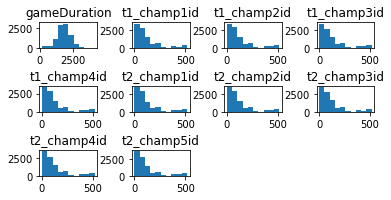

In [8]:
plt.subplots_adjust(hspace=1.5,wspace=0.6)
for i, col in enumerate(null_col):
    plt.subplot(4, 4, i+1)
    plt.title(col)
    plt.hist(df[col])

In [9]:
df = df.drop(columns=['gameId'],axis =1)

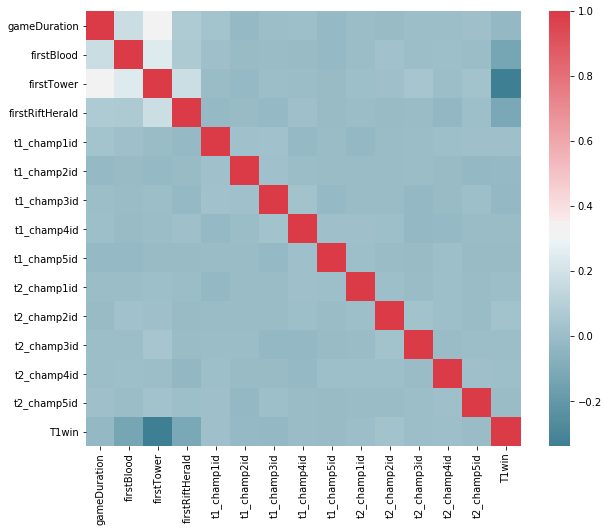

In [10]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [11]:
to_cat = ['t1_champ1id', 't1_champ2id', 
          't1_champ3id','t1_champ4id','t1_champ5id','t2_champ1id','t2_champ2id',
          't2_champ3id','t2_champ4id', 't2_champ5id']

df[to_cat] = df[to_cat].astype('O')


In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['T1win'])
y = df['T1win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from feature_engine.missing_data_imputers import FrequentCategoryImputer
from sklearn.preprocessing import StandardScaler
from feature_engine import discretisers as dsc

prepro_pipe1 = Pipeline([
    # missing data imputation 
    ('imputer_mode', mdi.FrequentCategoryImputer(variables=null_col[1:])),
    
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                          variables=['gameDuration']))])
prepro_pipe2 = Pipeline([
    #categorical encoding  
    ('rare_label_enc', ce.RareLabelCategoricalEncoder(
        tol=0.02, n_categories=50, variables=to_cat)),
    
    ('onehot_enc', ce.OneHotCategoricalEncoder(
    variables=to_cat,
    drop_last=True)),
    
    ('scale',StandardScaler())
])

In [14]:
prepro_pipe1.fit(X_train, y_train)
X_train=prepro_pipe1.transform(X_train)
X_test=prepro_pipe1.transform(X_test)
X_train[to_cat] = X_train[to_cat].astype('O')
X_test[to_cat] = X_test[to_cat].astype('O')
prepro_pipe2.fit(X_train, y_train)
X_train=prepro_pipe2.transform(X_train)
X_test=prepro_pipe2.transform(X_test)


# Basic Algorithm

In [15]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression().fit(X_train, y_train)

cv_scores = cross_val_score(clf, X_train, y_train,scoring='roc_auc')

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Print Co-efficients
print("Logistic.coef_:", clf.coef_)
print("Logistic.intercept_:", clf.intercept_)

# Check test data set performance
print("Logistic Performance: ", clf.score(X_test,y_test))



Mean Cross-validation scores: 0.7346435980930754

Logistic.coef_: [[ 0.28013618 -0.16682867 -0.91428293 -0.15326561 -0.00206976 -0.05007331
  -0.09109836 -0.08762    -0.01034329  0.03708968  0.18861595 -0.01268003
  -0.04581002 -0.05259209 -0.00266002 -0.02692515 -0.02888534 -0.14443643
  -0.13909252 -0.01293741 -0.04892237 -0.05048001 -0.10341349  0.02792365
  -0.06541653 -0.05954025 -0.01547774 -0.06799275 -0.0065341  -0.0209557
  -0.07433766 -0.04673176 -0.17124154 -0.02569674]]
Logistic.intercept_: [1.67299162]
Logistic Performance:  0.808


In [16]:
#Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,7)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True, scoring = 'roc_auc')
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Train Performance: ", grid_dtree.score(X_train,y_train))
print("Decision Tree Test Performance: ", grid_dtree.score(X_test,y_test))

Best Mean Cross-validation score: 0.79

Decision Tree parameters:  {'max_depth': 5}
Decision Tree Train Performance:  0.8148300828421521
Decision Tree Test Performance:  0.7971359834682448


In [17]:
#knn
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(5,10)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True, scoring='roc_auc')
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

Best Mean Cross-validation score: 0.78

KNN parameters:  {'n_neighbors': 6}
KNN Test Performance:  0.7959071066982955


In [18]:
from sklearn import svm

supvm = svm.SVC(random_state=0)

C = [0.1, 1, 10]

param_svm = [{'kernel': ['rbf'],
               'C': C,
               'gamma': [0.01, 0.1, 1]},
              {'kernel': ['linear'],
               'C': C}]

grid_svm = GridSearchCV(supvm, param_svm, cv=5,
                          return_train_score=True,scoring = 'roc_auc')
grid_svm.fit(X_train, y_train)
print('train score: ', grid_svm.score(X_train, y_train))
print('test score: ', grid_svm.score(X_train, y_train))
print("Best parameters: {}".format(grid_svm.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svm.best_score_))

train score:  0.838044781038701
test score:  0.838044781038701
Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.75


In [19]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=0)
rfc_param = { 
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

grid_rf = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, scoring = 'roc_auc')
grid_rf.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_rf.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_rf.best_params_}')
print(f'Train score is {grid_rf.score(X_train,y_train)}')
print(f'Test score is {grid_rf.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7992434898065742
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}
Train score is 0.8190898952059348
Test score is 0.8079581998483775


In [20]:
#gradient boost
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [4,5,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
grid_gd = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True,scoring = 'roc_auc' )
grid_gd.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_gd.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_gd.best_params_}')
print(f'Train score is {grid_gd.score(X_train,y_train)}')
print(f'Test score is {grid_gd.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8776173648818506
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 150}
Train score is 0.9971727778205536
Test score is 0.8917472671247952


In [21]:
#Extra tree
from sklearn.ensemble import ExtraTreesClassifier

etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [50,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid_et = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring = 'roc_auc' )
grid_et.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_et.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_et.best_params_}')
print(f'Train score is {grid_et.score(X_train,y_train)}')
print(f'Test score is {grid_et.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7921325577024543
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 50}
Train score is 0.8225673171053645
Test score is 0.8013705644273801


In [22]:
#xgboost
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [4,5,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.1,0.5,0.8],
               'min_child_weight' : [1,3,5],
                'subsample':[0.6,0.8,1]
             }
grid_xgb = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring = 'roc_auc' )
grid_xgb.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_xgb.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_xgb.best_params_}')
print(f'Train score is {grid_xgb.score(X_train,y_train)}')
print(f'Test score is {grid_xgb.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8592799937798384
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.8}
Train score is 0.9857219755621937
Test score is 0.8735999364163263


In [29]:
#top 5 estimators
estimators_ = [('dtree',grid_dtree.best_estimator_),
            ('rf',grid_rf.best_estimator_),('gd',grid_gd.best_estimator_),
            ('et',grid_et.best_estimator_),('xgb',grid_xgb.best_estimator_)]

In [31]:
from sklearn.ensemble import StackingClassifier
sclf1 = StackingClassifier(estimators= estimators_
                            , final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True,scoring='roc_auc' )
sclf1_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation params is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8883636914994948
Best Mean Cross Validation params is {'final_estimator__C': 0.1, 'stack_method': 'auto'}
Train score is 0.9962552994149823
Test score is 0.9019810288327504


# Cost Sensitive Algorithms

In [33]:
#cost sensitive logistic regession
param_grid = {   
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_logreg= GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_logreg.best_score_))

Best parameters: {'class_weight': {0: 10, 1: 1}}
Best Mean cross-validation score: 0.74


In [35]:
#svc
param_grid = {
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_svc= GridSearchCV(svm.SVC(), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_svc.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_svc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_svc.best_score_))

Best parameters: {'class_weight': {0: 10, 1: 1}}
Best Mean cross-validation score: 0.76


In [38]:
#decison tree
param_grid = { 
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_dtree= GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_dtree.best_score_))

Best parameters: {'class_weight': {0: 1, 1: 10}}
Best Mean cross-validation score: 0.79


In [39]:
#xgb
param_grid = { 
    'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
}
#apply grid search
cgrid_xgboost= GridSearchCV(XGBClassifier(), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_xgboost.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_xgboost.best_score_))

Best parameters: {'scale_pos_weight': 1}
Best Mean cross-validation score: 0.85


In [43]:
#random forest
from sklearn.model_selection import RepeatedStratifiedKFold
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % scores.mean())

Mean ROC AUC: 0.863


In [45]:
#extratrees
rf = ExtraTreesClassifier(n_estimators=50, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % scores.mean())

Mean ROC AUC: 0.864


In [47]:
#Bagging decision tree with under sampling
from imblearn.ensemble import BalancedBaggingClassifier

b_dtree = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(b_dtree, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % scores.mean())

Mean ROC AUC: 0.855


# Data Sampling Algorithms

In [57]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [61]:
#decisiontreee
pipe_roc_dtree = Pipeline([('smote',SMOTE()),('dtree',DecisionTreeClassifier(max_depth=5))])
param_roc_dtree = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_dtree= GridSearchCV(pipe_roc_dtree,param_roc_dtree, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_dtree.best_score_))

Best parameters: {'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.80


In [62]:
#logistic regression
pipe_roc_lg = Pipeline([('smote',SMOTE()),('lg',LogisticRegression())])
param_roc_lg = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_lg= GridSearchCV(pipe_roc_lg,param_roc_lg, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_lg.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_lg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_lg.best_score_))

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.74


In [63]:
#knn
pipe_roc_knn = Pipeline([('smote',SMOTE()),('knn',KNeighborsClassifier(n_neighbors=6))])
param_roc_knn = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_knn= GridSearchCV(pipe_roc_knn,param_roc_knn, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_knn.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_knn.best_score_))

Best parameters: {'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.80


In [66]:
#svm
pipe_roc_svm = Pipeline([('smote',SMOTE()),('svm',svm.SVC(C=10,gamma=0.1,kernel='rbf'))])
param_roc_svm = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_svm= GridSearchCV(pipe_roc_svm,param_roc_svm, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_svm.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_svm.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_svm.best_score_))

Best parameters: {'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.79


In [67]:
#randomforest
pipe_roc_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=50,criterion='gini',
                                                                       max_features='auto'))])
param_roc_rf = {'smote__k_neighbors': [1,2,3,4,5],
                'rf__max_depth' : [4,5]}

ogrid_rf= GridSearchCV(pipe_roc_rf,param_roc_rf, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_rf.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_rf.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_rf.best_score_))

Best parameters: {'rf__max_depth': 5, 'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.79


In [76]:
#xgb
pipe_roc_xgb = Pipeline([('smote',SMOTE()),('xgb',XGBClassifier(random_state=42,
                                                                            early_stopping_rounds=2,
                                                                            n_estimators=100,
                                                                            objective ='binary:logistic',
                                                                            max_depth = 4,
                                                                             ))])
param_roc_xgb = {'smote__k_neighbors': [1,2,3,4,5],
                 'xgb__learning_rate' : [0.1,0.5]}

ogrid_xgb= GridSearchCV(pipe_roc_xgb,param_roc_xgb, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_xgb.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_xgb.best_score_))

Best parameters: {'smote__k_neighbors': 1, 'xgb__learning_rate': 0.5}
Best Mean cross-validation score: 0.83


In [78]:
#easy ensemble classifier
from imblearn.ensemble import EasyEnsembleClassifier
pipe_roc_ee = Pipeline([('smote',SMOTE()),('ee',EasyEnsembleClassifier())])
param_roc_ee = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_ee= GridSearchCV(pipe_roc_ee,param_roc_ee, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_ee.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_ee.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_ee.best_score_))

Best parameters: {'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.77


In [79]:
#top 5 estimators
estimators_ = [('dtree',ogrid_dtree.best_estimator_),
            ('rf',grid_rf.best_estimator_),('gd',grid_svm.best_estimator_),
            ('et',grid_knn.best_estimator_),('xgb',ogrid_xgb.best_estimator_)]

In [81]:
from sklearn.ensemble import StackingClassifier
sclf2 = StackingClassifier(estimators= estimators_
                            , final_estimator=LogisticRegression())
sclf2_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring='roc_auc' )
sclf2_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation params is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8449165281887252
Best Mean Cross Validation params is {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.9351857289779396
Test score is 0.8614540791372184
